# Demonstration of PandasAI 
PandasAI is the new cool kid on the block bringing `pandas`(https://pandas.pydata.org) and large language models (LLMs) together. This allows queries to be made on `DataFrame` objects with natural language prompts.

## Preparation
### Setting up environment
We set up iPython-Kernel and other packages inside a virtual environment. For this, we use `virtualenv`. 

#### Example for Unix-based Systems:

##### install virtualenv
`pip3 install virtualenv`

##### create a virtualenv
`virtualenv pandasai_demo`

##### activate the virtual environment
`source pandasai_demo/bin/activate`

Now that we have set up virtual environment, we can install required packages in the environment.

`pip3 install -r requirements.txt`

## Demonstration
We are going to compare functionality of `pandasai` and `pandas` native queries. For this, we use dataset about eCharging ports provided by Bundesnetzagentur of german federal government. Dataset is included in `raw_data/opendata_rkn_ladesaulen_in_de.json`, but can also be downloaded [here](https://open.nrw/dataset/deutschland-e-ladesaulen-ne). 

### Importing
We are going to use OpenAI as LLM backend. There are lots of others to choose from.

In [1]:
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

For us to be able to use OpenAI backend, we must provide an API token from OpenAI. You can create a free account and get a token [here](https://platform.openai.com/account/api-keys). Replace "<my_api_key>" with your actual API key.

In [2]:
MY_API_TOKEN = "<my_api_key>"

open_ai = OpenAI(api_token=MY_API_TOKEN)
pdai = PandasAI(llm=open_ai, verbose=False, conversational=False)

Now we load the json file into a `DataFrame` with pandas.

In [3]:
json_path =  "raw_data/opendata_rkn_ladesaulen_in_de.json" 
df = pd.read_json(json_path)

Looking at `df`, we can see lots of data about charging ports with detailed locations.

In [4]:
df

,betreiber,art_der_ladeeinrichung,anzahl_ladepunkte,anschlussleistung,steckertypen1,steckertypen2,steckertypen3,steckertypen4,p1_kw,p2_kw,p3_kw,p4_kw,kreis_kreisfreie_stadt,ort,postleitzahl,strasse,hausnummer,adresszusatz,inbetriebnahmedatum,koordinaten
0,FairEnergie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis Reutlingen,Reutlingen,72760,Sankt-Peter-Straße,4,None,2020-05-13,"{'lon': 9.20186, 'lat': 48.49808}"
1,FairEnergie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis Reutlingen,Reutlingen,72760,Alice-Haarburger-Straße,1,None,2020-12-11,"{'lon': 9.199504, 'lat': 48.501138}"
2,FairEnergie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis Reutlingen,Reutlingen,72762,Pestalozzistraße,7,None,2020-05-13,"{'lon': 9.19373, 'lat': 48.48499}"
3,FairEnergie GmbH,Normalladeeinrichtung,2,44.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis Reutlingen,Reutlingen,72762,Alteburgstraße,11,None,2020-05-13,"{'lon': 9.20713, 'lat': 48.48809}"
4,FairEnergie GmbH,Schnellladeeinrichtung,2,72.0,"DC Kupplung Combo, DC CHAdeMO",AC Steckdose Typ 2,None,None,50.0,22.0,NaN,NaN,Landkreis Reutlingen,Reutlingen,72762,Oskar-Kalbfell-Platz,8,None,2020-05-13,"{'lon': 9.20958, 'lat': 48.48996}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36003,OUTLETCITY METZINGEN,Normalladeeinrichtung,2,22.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,22.0,22.0,NaN,NaN,Landkreis Reutlingen,Metzingen,72555,Maienwaldstraße,2,Parkhaus Ebene 2,2022-07-25,"{'lon': 9.27754, 'lat': 48.53256}"
36004,OUTLETCITY METZINGEN,Normalladeeinrichtung,1,11.0,AC Steckdose Typ 2,None,None,None,11.0,NaN,NaN,NaN,Landkreis Reutlingen,Metzingen,72555,Friedrich-Herrmann-Str.,1,Parkplatz,2022-08-15,"{'lon': 9.27918, 'lat': 48.53953}"
36005,EnBW mobility+ AG und Co.KG,Normalladeeinrichtung,2,30.0,"AC Steckdose Typ 2, AC Schuko","AC Steckdose Typ 2, AC Schuko",None,None,22.0,22.0,NaN,NaN,Landkreis Reutlingen,Dettingen,72581,Rathausplatz,2,None,2020-09-29,"{'lon': 9.3464847, 'lat': 48.5288533}"
36006,E.ON Drive GmbH,Normalladeeinrichtung,2,33.0,AC Steckdose Typ 2,AC Steckdose Typ 2,None,None,11.0,22.0,NaN,NaN,Landkreis Altötting,Burghausen,84489,Hauserbauernstraße,7,None,2018-09-20,"{'lon': 12.833134, 'lat': 48.171422}"


Lets create a query that returns rows containing information about charging ports in city of Bonn only. Since the dataset is in german, we use german language query.

In [5]:
pdai.run(df, "Zeilen mit Betreiber im Ort Bonn")

,betreiber
7423,Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
7424,Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
7425,Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
7426,Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
7427,Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
...,...
24771,Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
24772,Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
24773,Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
24774,Energie- und Wasserversorgung Bonn/Rhein-Sieg ...


This method returned 133 rows. Now we can compare it with manual query with pandas.

In [6]:
df["betreiber"].loc[df["ort"].str.lower() == "bonn"]

7423     Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
7424     Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
7425     Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
7426     Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
7427     Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
                               ...                        
24771    Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
24772    Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
24773    Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
24774    Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
24775    Energie- und Wasserversorgung Bonn/Rhein-Sieg ...
Name: betreiber, Length: 133, dtype: object

133 rows were returned with `betreiber` column, which is the vendor of the charging port. So results with pandasai was accurate. 

Now, lets try doing numeric queries.

In [8]:
df[["p1_kw", "p2_kw", "p3_kw", "p4_kw"]].max()

p1_kw    360.0
p2_kw    360.0
p3_kw    360.0
p4_kw    360.0
dtype: float64

In column `p1_kw`, there is data about max power the charging port can deliver in kilowatts. In this dataset, maximum charge power seems to be 360 kW. Now doing pandasai query, 

In [9]:
pdai.run(df, "Maximale Leistung in kW")

360.0

We can see the result was accurate again. Lets try to make it generate a graph.

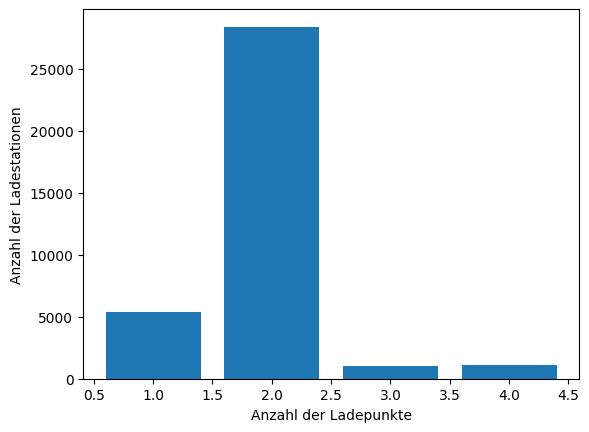

In [14]:
pdai.run(df, "Graphische Darstellung der Anzahl der Ladepunkte")

## Breakdown
PandasAI converts prompts into actual query code and runs the query in dataframe. This can be visualized using `verbose=True` while initialising `PandasAI` instance. 

In [10]:
pdai_verbose_breakdown = PandasAI(llm=open_ai, verbose=True)

Now we rerun the query and break it down.

In [11]:
pdai_verbose_breakdown.run(df, "Maximale Leistung in kW")

Running PandasAI with openai LLM...

Code generated:
```
max_leistung = df[['p1_kw', 'p2_kw', 'p3_kw', 'p4_kw']].max().max()
print(max_leistung)
```
Answer: 360.0
Conversational answer: The maximum power output in kilowatts is 360.


'The maximum power output in kilowatts is 360.'

You can see breakdown of workflow while generating code, running it and producing output.

## Conclusion
PandasAI seems to do general tasks really good and is a definitely a good tool to use in certain workloads like explorative data analysis. 